In [1]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [2]:
# common variables 
from nba_api.stats.static import teams

teamIds = dict([(team['abbreviation'], team['id']) for team in teams.get_teams()])

# # get all team abbreviations since 1983 associated with each team ID (takes a few minutes to run)

# from nba_api.stats.endpoints import leaguegamefinder
# import time

# teamAbbrevsDict = dict()

# for teamAbbrev in teamIds.keys():
#     allGamesDf = leaguegamefinder.LeagueGameFinder(team_id_nullable=teamIds[teamAbbrev]) \
#                                  .get_data_frames()[0]
    
#     teamAbbrevsDict[int(allGamesDf['TEAM_ID'].unique())] = list(allGamesDf['TEAM_ABBREVIATION'].unique())
    
#     time.sleep(1)

teamAbbrevsDict = {1610612737: ['ATL'], 1610612738: ['BOS'], 1610612739: ['CLE'], 1610612740: ['NOP', 'NOH', 'NOK']
                   , 1610612741: ['CHI'], 1610612742: ['DAL'], 1610612743: ['DEN'], 1610612744: ['GSW', 'GOS']
                   , 1610612745: ['HOU'], 1610612746: ['LAC', 'SDC'], 1610612747: ['LAL'], 1610612748: ['MIA']
                   , 1610612749: ['MIL'], 1610612750: ['MIN'], 1610612751: ['BKN', 'NJN'], 1610612752: ['NYK']
                   , 1610612753: ['ORL'], 1610612754: ['IND'], 1610612755: ['PHI', 'PHL'], 1610612756: ['PHX']
                   , 1610612757: ['POR'], 1610612758: ['SAC', 'KCK'], 1610612759: ['SAS', 'SAN'], 1610612760: ['OKC', 'SEA']
                   , 1610612761: ['TOR'], 1610612762: ['UTA', 'UTH'], 1610612763: ['MEM', 'VAN'], 1610612764: ['WAS']
                   , 1610612765: ['DET'], 1610612766: ['CHA', 'CHH']
                  }

standardStats = ["FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT"
                 ,"PTS","OREB","DREB","REB","AST","TOV","STL","BLK","PF","PLUS_MINUS"
                ]
advancedStats = ["OFF_RATING","DEF_RATING","NET_RATING"
                 ,"AST_PCT","AST_TO","AST_RATIO","TM_TOV_PCT"
                 ,"OREB_PCT","DREB_PCT","REB_PCT"
                 , "EFG_PCT", "TS_PCT", "PACE", "POSS"
                ]


In [3]:
# load data (saved above: per game stats for all stats of all seasons)
loadDir = '' # input path where data will be loaded from

# regular season
loadFName = 'allTeams_perGameStats_regSeason_filtered_above500_1983-2022'
with open(loadDir + loadFName, 'rb') as file:
    seasonStats = pickle.load(file)
    
# playoffs
loadFName = 'allTeams_perGameStats_playoffs_filtered_above500_1983-2022'
with open(loadDir + loadFName, 'rb') as file:
    playoffStats = pickle.load(file)

In [59]:
# take a look at data
seasonStats['2001']

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,POSS,REB_PCT,Restricted Area FGA,Restricted Area FGM,Restricted Area FG_PCT,Right Corner 3 FGA,Right Corner 3 FGM,Right Corner 3 FG_PCT,TM_TOV_PCT,TS_PCT
0,1610612737,ATL,Atlanta Hawks,51,35.196078,81.078431,43.494118,5.039216,14.862745,34.158824,...,93.634146,49.1,27.695122,15.926829,57.5,2.073171,0.756098,36.5,16.6,51.7
1,1610612738,BOS,Boston Celtics,46,35.000000,81.913043,42.821739,8.586957,24.000000,35.632609,...,94.365854,48.1,26.134146,14.609756,55.9,2.963415,1.024390,34.6,14.4,52.0
2,1610612739,CLE,Cleveland Cavaliers,51,35.137255,79.764706,44.066667,4.725490,12.764706,36.456863,...,92.109756,50.5,22.207317,12.439024,56.0,1.390244,0.585366,42.1,15.8,52.4
3,1610612741,CHI,Chicago Bulls,50,33.780000,77.980000,43.384000,3.540000,10.320000,32.828000,...,92.060976,48.7,24.170732,13.414634,55.5,0.975610,0.256098,26.3,16.6,49.9
4,1610612742,DAL,Dallas Mavericks,46,38.434783,83.869565,45.930435,7.826087,21.304348,37.123913,...,95.402439,48.7,24.475610,14.780488,60.4,1.865854,0.743902,39.9,12.7,55.3
5,1610612743,DEN,Denver Nuggets,50,35.040000,84.000000,41.904000,5.440000,15.980000,34.256000,...,91.914634,49.7,26.012195,14.975610,57.6,2.268293,0.853659,37.6,16.0,49.5
6,1610612744,GSW,Golden State Warriors,50,36.980000,85.660000,43.312000,4.160000,12.440000,33.312000,...,96.219512,51.6,28.280488,17.134146,60.6,1.353659,0.463415,34.2,17.5,49.9
7,1610612745,HOU,Houston Rockets,50,33.860000,79.720000,42.618000,6.660000,18.960000,34.598000,...,90.926829,49.7,24.646341,14.341463,58.2,1.756098,0.621951,35.4,15.5,50.7
8,1610612746,LAC,LA Clippers,48,35.375000,81.208333,43.731250,5.250000,14.395833,35.422917,...,94.050000,51.2,22.950000,14.200000,61.9,0.887500,0.350000,39.4,16.1,51.9
9,1610612747,LAL,Los Angeles Lakers,46,37.478261,83.239130,45.171739,5.891304,17.521739,33.367391,...,94.950617,50.1,24.617284,16.012346,65.0,2.555556,1.061728,41.5,13.5,53.4


## Bar plots of paired diffs (playoffs minus regSeason)

In [4]:
# function to get playoffs minus regSeason for every team across inputted seasons

def get_playoff_minus_regSeason(yearStrs, seasonStats, playoffStats):
    '''
    Calculate differences in stats between playoffs and regular season across all seasons.
    
    Parameters:
    yearsStrs (list) = all years to calculate differences for
    seasonStats (dict) = dictionary with nested dataframes of stats for each year
    playoffStats (dict) = same as seasonStats but for playoff stats
    '''
    
    allPairedDiffs = pd.DataFrame(columns=['YEAR'] + list(seasonStats['1997'].columns)) # initiate empty df

    for yearStr in yearStrs:
        playoffTeams = playoffStats[yearStr]['TEAM_NAME'].to_list()
        regSeasonParsed = seasonStats[yearStr][seasonStats[yearStr]['TEAM_NAME'].apply(lambda teamName: teamName in playoffTeams)]

        if int(yearStr) >= 1997: # advanced stats start with 1997 season
            colNames = standardStats + advancedStats
        else:
            colNames = standardStats

        pMinusR = playoffStats[yearStr][colNames] - regSeasonParsed[colNames].reset_index(drop=True)
        pMinusR['YEAR'] = yearStr
        pMinusR[['TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME']] = playoffStats[yearStr][['TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME']]

        allPairedDiffs = allPairedDiffs.append(pMinusR)

    return allPairedDiffs
        

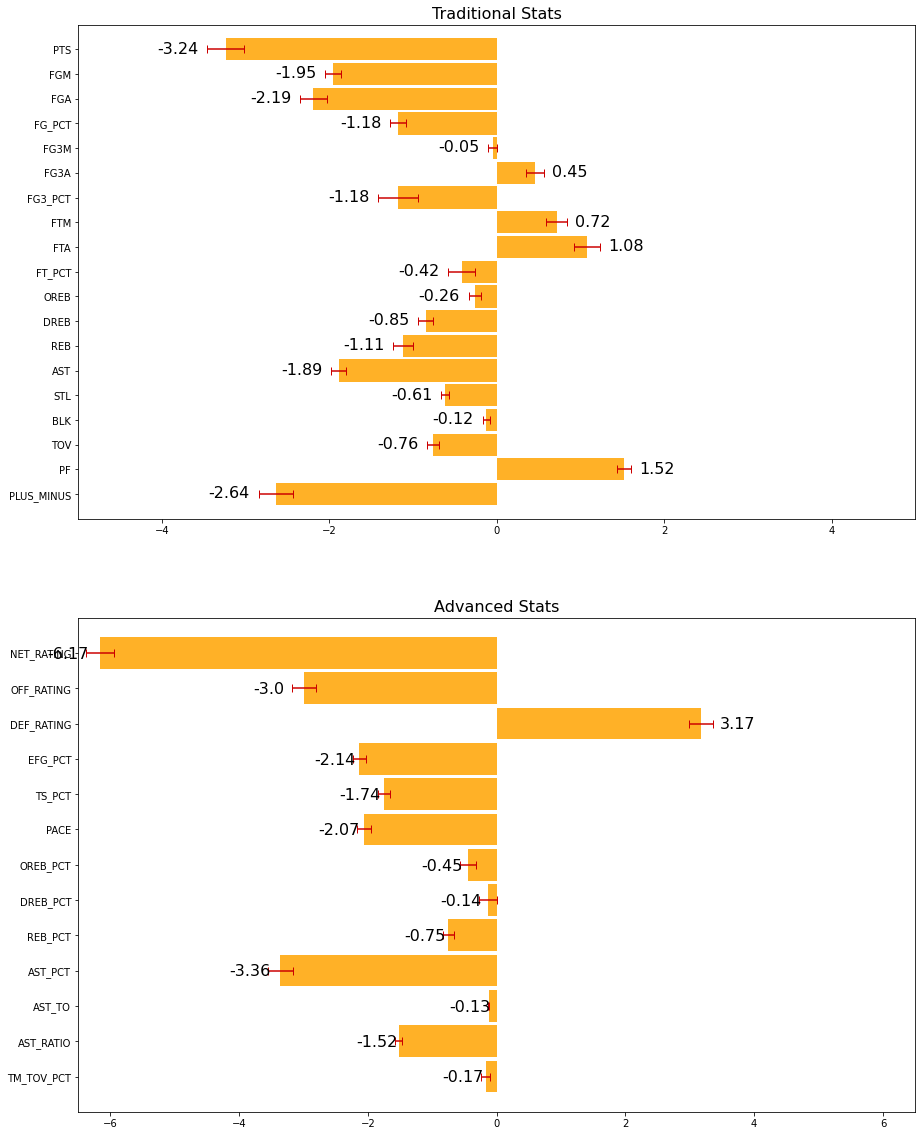

In [7]:
# plot all paired diffs
barWidth = 1.8   # bar width
standardCols = ['PTS', 'FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT'
                ,'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PLUS_MINUS'
               ]
advancedCols = ['NET_RATING','OFF_RATING','DEF_RATING','EFG_PCT','TS_PCT','PACE'
                ,'OREB_PCT','DREB_PCT','REB_PCT','AST_PCT','AST_TO','AST_RATIO','TM_TOV_PCT'
               ]
yearStrs = [str(seasonInt) for seasonInt in np.arange(1983, 2022)] # years to calcualte differences for
barColor = [255/255, 177/255, 39/255] # color of bars

# get differences (playoffs minus regSeason) for inputted seasons
allPairedDiffs = get_playoff_minus_regSeason(yearStrs, seasonStats, playoffStats)

figH = plt.figure(figsize=(15,20))

for plotNum in [1, 2]: # separate subplots for traditional and advanced stats

    if plotNum == 1:
        colsToUse = standardCols
        titStr = 'Traditional Stats'
    elif plotNum == 2:
        colsToUse = advancedCols
        titStr = 'Advanced Stats'

    colsToUse.reverse() # reverse order so that first entries are plotted starting from top of horz bar plot
    yCoords = np.arange(0, len(colsToUse)*2, 2) # y-coordinates for where bars are plotted
        
    dataToPlot = allPairedDiffs[colsToUse]

    axH = figH.add_subplot(2, 1, plotNum)

    axH.barh(yCoords,
           width=np.nanmean(dataToPlot, axis=0),
           height=barWidth,
           color=barColor,
           xerr=np.std(dataToPlot,axis=0)/np.sqrt(dataToPlot.shape[0]), # error bars
           capsize=4,
           ecolor=[0.8, 0, 0],
           tick_label=dataToPlot.columns
           )

    if plotNum == 1:
        plt.xlim([-5, 5])
    elif plotNum == 2:
        plt.xlim([-6.5, 6.5])
        
    plt.ylim([-2, len(dataToPlot.columns)*2])
    plt.title(titStr, fontsize=16)

    # plot exact values next to bars
    for statInd in np.arange(0, len(colsToUse)): 
        x = np.nanmean(dataToPlot, axis=0)[statInd]
        y = yCoords[statInd]-0.3
        sem = list(np.std(dataToPlot,axis=0)/np.sqrt(dataToPlot.shape[0]))[statInd]

        if x < 0:
            plt.text(x-sem-0.6, y, str(round(x, 2)), fontsize=16)
        elif x>= 0:
            plt.text(x+sem+0.1, y, str(round(x, 2)), fontsize=16)
        

<ipython-input-8-02d3b86b5acc>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axH = figH.add_subplot(2, 1, plotNum)


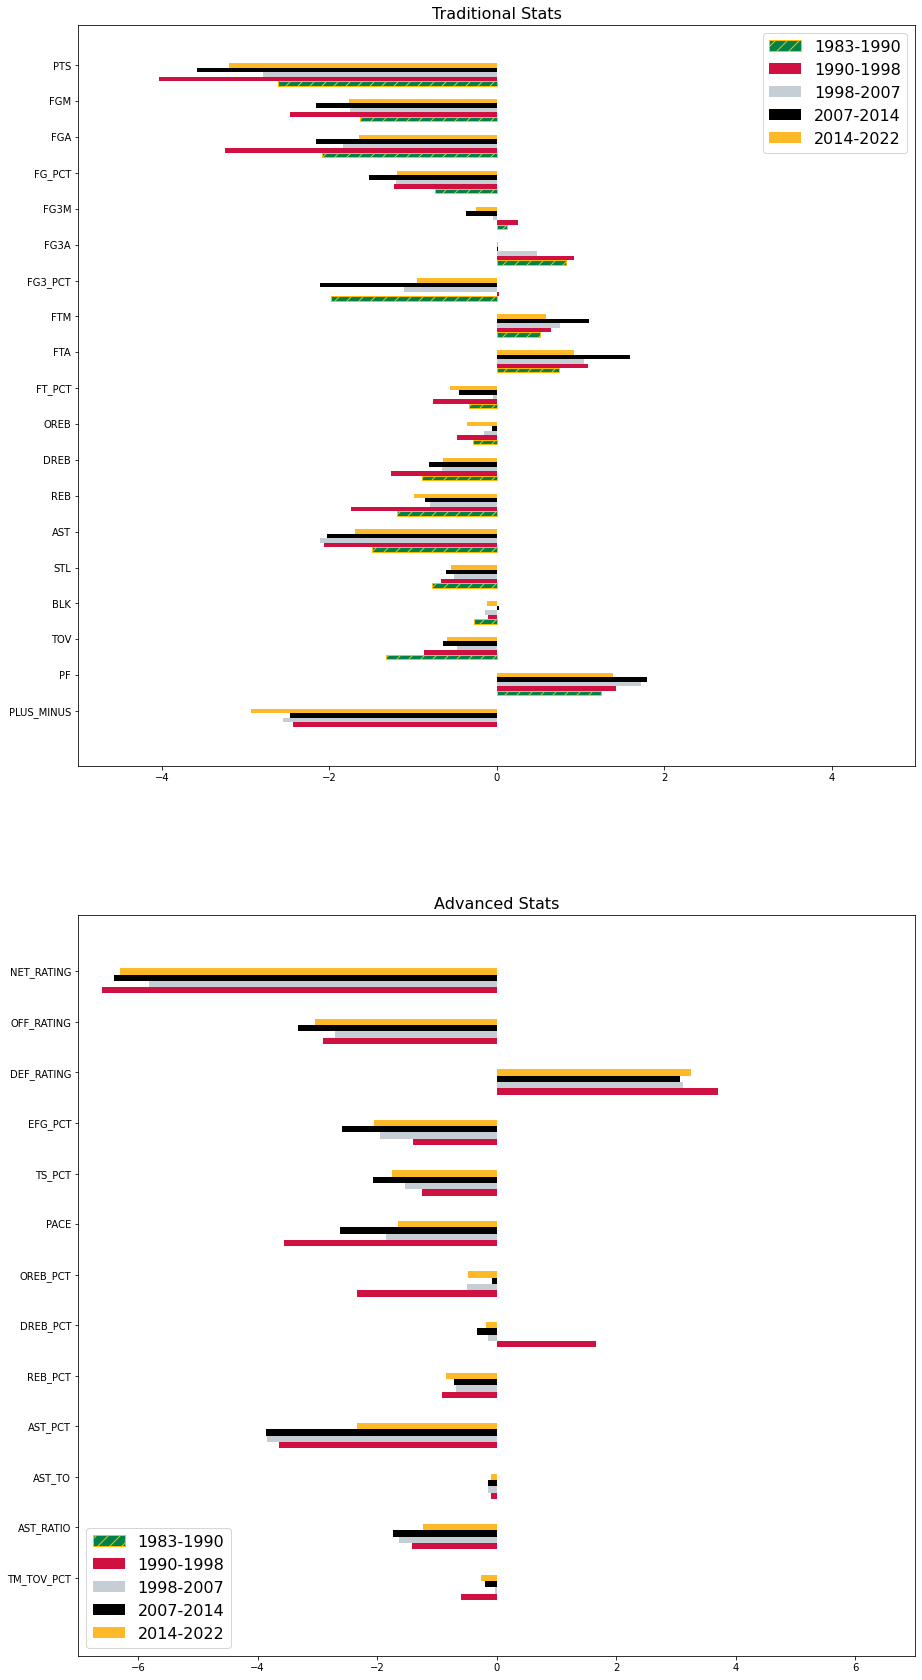

In [8]:
standardCols = ['PTS', 'FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT'
                ,'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PLUS_MINUS'
               ]
advancedCols = ['NET_RATING','OFF_RATING','DEF_RATING','EFG_PCT','TS_PCT','PACE'
                ,'OREB_PCT','DREB_PCT','REB_PCT','AST_PCT','AST_TO','AST_RATIO','TM_TOV_PCT'
               ]
yearStrs = [str(seasonInt) for seasonInt in np.arange(1983, 2022)]
eras = [[str(seasonInt) for seasonInt in np.arange(1983, 1990)] # break down years into eras
        , [str(seasonInt) for seasonInt in np.arange(1990, 1998)]
        , [str(seasonInt) for seasonInt in np.arange(1998, 2007)]
        , [str(seasonInt) for seasonInt in np.arange(2007, 2014)]
        , [str(seasonInt) for seasonInt in np.arange(2014, 2022)]
       ]
faceColors = [[0/255, 130/255, 72/255], [206/255, 17/255, 65/255] # corresponds to order of eras
               , [196/255, 206/255, 212/255], [0/255, 0/255, 0/255], [253/255, 185/255, 39/255]
             ]
edgeColors = [[255/255, 185/255, 0/255], [0/255, 0/255, 0/255] # corresponds to order of eras
               , [0/255, 0/255, 0/255], [255/255, 185/255, 0/255], [29/255, 66/255, 138/255]
             ]

# get data for inputted seasons
allPairedDiffs = get_playoff_minus_regSeason(yearStrs, seasonStats, playoffStats)

figH = plt.figure(figsize=(15,30))
barWidth = 1.5

for plotNum in [1, 2]: # separate subplots for traditional and advanced stats

    if plotNum == 1:
        colsToUse = standardCols
        titStr = 'Traditional Stats'
    elif plotNum == 2:
        colsToUse = advancedCols
        titStr = 'Advanced Stats'

    colsToUse.reverse() # reverse order so that first entries are plotted starting from top of horz bar plot
    yCoords = np.arange(0, len(colsToUse)*12, 12) # y-coordinates for where bars are plotted
        
    for eraInd in np.arange(len(eras)):

        # get data for inputted seasons
        eraYears = eras[eraInd]
        allPairedDiffs = get_playoff_minus_regSeason(eraYears, seasonStats, playoffStats)
        dataToPlot = allPairedDiffs[colsToUse]

        axH = figH.add_subplot(2, 1, plotNum)
        
        if eraInd == 0: # use stripes for first bar plotted
            axH.barh(yCoords-barWidth*(len(eras)-eraInd),
                   width=np.mean(dataToPlot, axis=0),
                   color=faceColors[eraInd],
                   edgecolor=edgeColors[eraInd],
                   hatch='//',
    #                xerr=np.std(dataToPlot,axis=0)/np.sqrt(dataToPlot.shape[0]), # error bars
    #                capsize=4, # error bar cap width in points
                   height=barWidth,    # bar width
                   tick_label=dataToPlot.columns,
                   ecolor=[0.8, 0, 0],    # error bar colors; setting this raises an error for whatever reason.
                   )
        else:
            axH.barh(yCoords-barWidth*(len(eras)-eraInd),
                   width=np.mean(dataToPlot, axis=0),
                   color=faceColors[eraInd],
                   height=barWidth,    # bar width
                   tick_label=dataToPlot.columns,
                   ecolor=[0.8, 0, 0],    # error bar colors; setting this raises an error for whatever reason.
                   )


#         # plot exact values next to bars
#         for statInd in np.arange(0, len(colsToUse)): 
#             x = np.mean(dataToPlot, axis=0)[statInd]
#             y = yCoords[statInd] - barWidth*(len(eras)-eraInd)

#             if ~np.isnan(x):
#                 plt.text(x, y, str(round(x, 2)), fontsize=16)
        
    if plotNum == 1:
        plt.xlim([-5, 5])
    elif plotNum == 2:
        plt.xlim([-7, 7])
    
    plt.ylim([-20, len(dataToPlot.columns)*12])
    plt.title(titStr, fontsize=16)
    plt.legend([eras[eraInd][0] + '-' + str(int(eras[eraInd][-1])+1) for eraInd in np.arange(len(eras))], fontsize=16)